In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv("Numeric.csv")

In [3]:
X = df[['Length', 'No_of_Capital', 'No_of_Small', 'No_of_Special', 'No_of_Numbers']]
y = df["Strength"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42,
    class_weight={0: 1, 1: 2}
)

In [7]:
model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.","{0: 1, 1: 2}"
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [8]:
y_prob = model.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

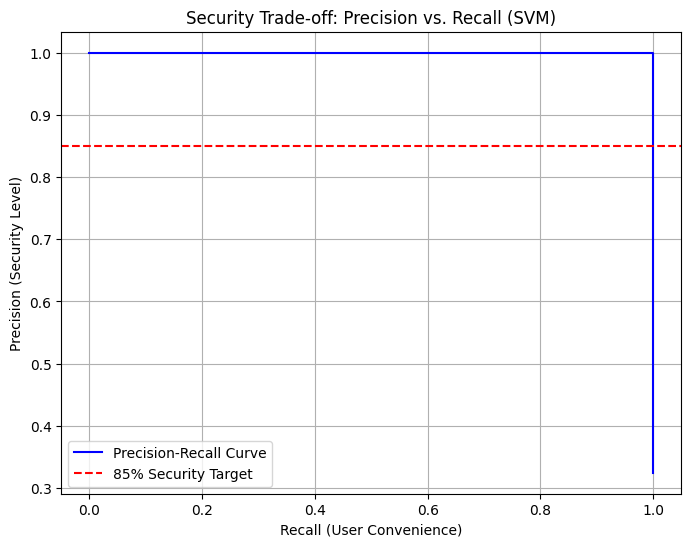

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Security Target')
plt.xlabel('Recall (User Convenience)')
plt.ylabel('Precision (Security Level)')
plt.title('Security Trade-off: Precision vs. Recall (SVM)')
plt.legend()
plt.grid(True)
plt.show()



In [10]:
target_precision_balanced = 0.85 
idx_balanced = np.argmax(precision >= target_precision_balanced) 
best_threshold_balanced = thresholds[idx_balanced]
print(f"To ensure 85% of 'Strong' labels are correct, use threshold: {best_threshold_balanced:.4f}")

To ensure 85% of 'Strong' labels are correct, use threshold: 0.0006


In [11]:
y_pred_balanced = (y_prob >= best_threshold_balanced).astype(int)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

Accuracy: 0.9438049179211225

Confusion Matrix:
[[9092  825]
 [   0 4764]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      9917
           1       0.85      1.00      0.92      4764

    accuracy                           0.94     14681
   macro avg       0.93      0.96      0.94     14681
weighted avg       0.95      0.94      0.94     14681



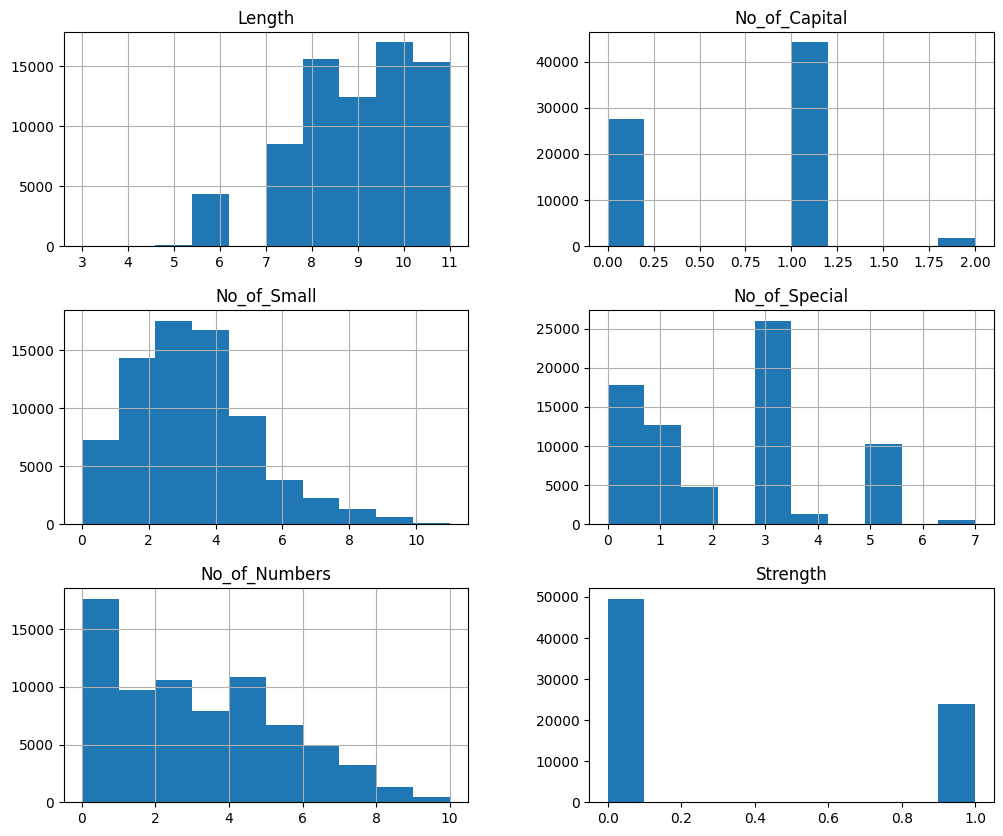

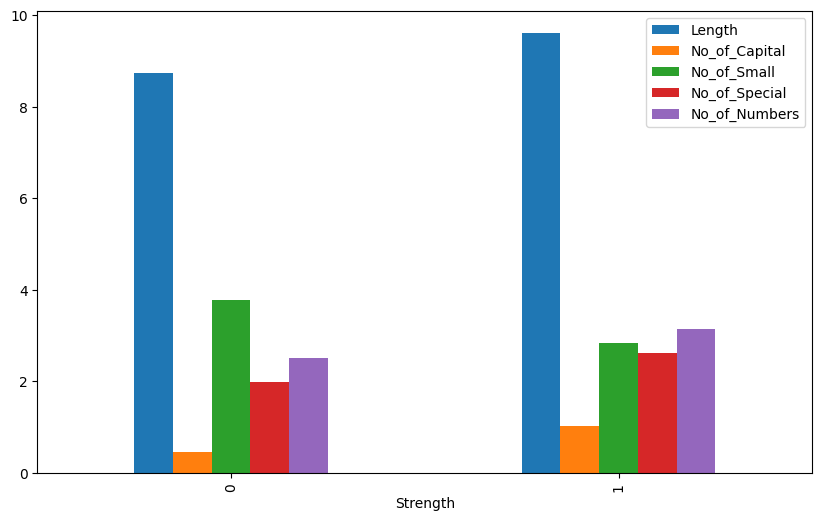

In [13]:
df.hist(figsize=(12,10))
plt.grid(False)
plt.show()

df.groupby("Strength").mean().plot(kind="bar", figsize=(10,6))
plt.grid(False)
plt.show()


In [15]:
joblib.dump(model,"SVM_Model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']